In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from mlchecks import Dataset

df = fetch_covtype(as_frame=True).frame
label = 'Cover_Type'

train_df, validation_df = train_test_split(df, test_size=0.33)
train = Dataset(train_df, label=label)
validation = Dataset(validation_df, label=label)

clf = AdaBoostClassifier()
features = train_df.drop(label, axis=1)
target = train_df[label]
clf.fit(features, target)

AdaBoostClassifier()

Confidence Change

Check whether the confidence of the model changed, in order to understand if important features drifted.

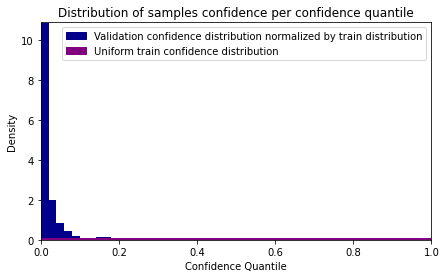

Top Confidence Samples Indexes

,Model Prediction,Confidence Quantile
318669,3,1.000000
331754,3,1.000000
277706,3,0.980000
326834,3,0.980000
12864,3,0.980000


Worst Confidence Samples Indexes

,Model Prediction,Confidence Quantile
509262,3,0.000000
414913,3,0.000000
165957,3,0.000000
387191,3,0.000000
327039,3,0.000000


In [30]:
from mlchecks.checks import confidence_change

confidence_change(train, validation, clf)